# Efficient Frontier and Sharpe Optimal Portfolio

<img src="markowitz.png" style="width:500px;height:400px">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cvx

In [2]:
def expected_return(u, x):
    return np.dot(u, x.T).flatten()

def standard_deviation(V, x):
    return np.sqrt(np.sum(x*(np.dot(V,x.T).T), axis=1))

def generate_random_portfolios(num_assets, num_samples):
    e = np.identity(num_assets)
    beta = 2*np.random.rand(num_samples*num_assets,1)-1
    return beta*np.repeat(e,repeats=num_samples, axis=0) + (1-beta)*np.tile(e, reps=(num_samples,1))

-----

In [3]:
u = np.array([[3.15, 1.75, -6.39, -2.86, -6.75, -0.54, -6.75, -5.26]])
V = np.array([[0.001, 0.0013, -0.0006, -0.0007, 0.0001, 0.0001, -0.0004, -0.0004],
              [0.0013, 0.0073, -0.0013, -0.0006, -0.0022, -0.001, 0.0014, -0.0015],
              [-0.0006, -0.0013, 0.0599, 0.0276, 0.0635, 0.023, 0.033, 0.048],
              [-0.0007, -0.0006, 0.0276, 0.0296, 0.0266, 0.0215, 0.0207, 0.0299],
              [0.0001, -0.0022, 0.0635, 0.0266, 0.1025, 0.0427, 0.0399, 0.066],
              [0.0001, -0.001, 0.023, 0.0215, 0.0427, 0.0321, 0.0199, 0.0322],
              [-0.0004, 0.0014, 0.033,  0.0207, 0.0399, 0.0199, 0.0284, 0.0351],
              [-0.0004, -0.0015, 0.048, 0.0299, 0.066, 0.0322, 0.0351, 0.08]])

In [4]:
num_assets = u.shape[1]
num_samples = 1000
X = generate_random_portfolios(num_assets, num_samples)

In [5]:
Std = standard_deviation(V, X)
Er = expected_return(u, X)

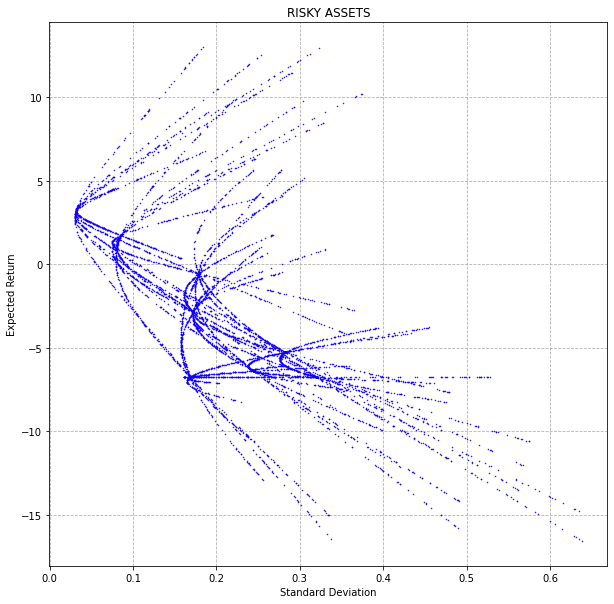

In [6]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
ax.grid(visible=True, linestyle='--')
ax.set_title('RISKY ASSETS')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Expected Return')
ax.plot(Std, Er, marker='.', color='#0F00FF', markersize=1, linestyle='')

In [7]:
def optimal_portfolio(u, V, r):
    x = cvx.Variable(u.shape)
    f = cvx.quad_form(x.T, V)
    prob = cvx.Problem(cvx.Minimize(f), 
                      [cvx.sum(x) == 1,
                       u @ x.T == r])
    prob.solve(solver=cvx.ECOS)
    return x.value

def efficient_frontier(u, V):
    r1 = 1.
    x1 = optimal_portfolio(u=u, V=V, r=r1)

    r2 = -1.
    x2 = optimal_portfolio(u=u, V=V, r=r2)
    
    y1 = (x1-x2)/(r1-r2)
    y2 = (r1*x2-r2*x1)/(r1-r2)
    
    a = np.dot(y1, np.dot(V, y1.T)).flatten()
    b = (np.dot(y1, np.dot(V, y2.T))+np.dot(y2, np.dot(V, y1.T))).flatten()
    c = np.dot(y2, np.dot(V, y2.T)).flatten()

    def ef(r):
        return np.sqrt(a*r**2 + b*r + c)
    return ef

In [8]:
r = (np.max(Er)-np.min(Er))*np.random.rand(10000)+np.min(Er)
s = efficient_frontier(u, V)(r)

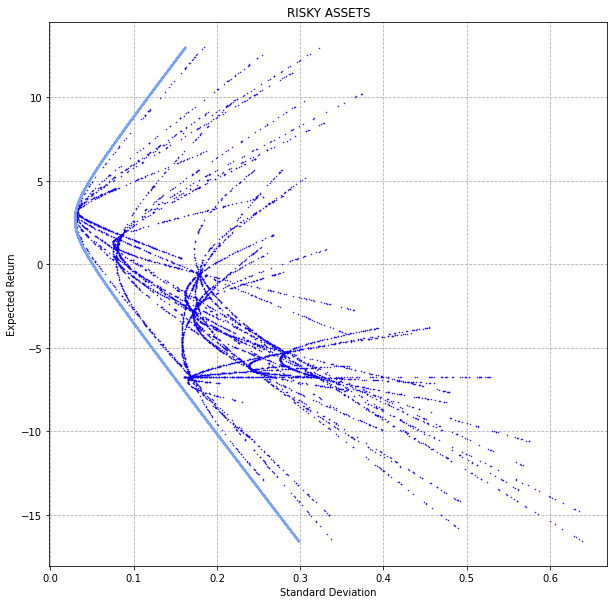

In [9]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
ax.grid(visible=True, linestyle='--')
ax.set_title('RISKY ASSETS')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Expected Return')
ax.plot(Std, Er, marker='.', color='#0F00FF', markersize=1, linestyle='')
ax.plot(s, r, marker='.', color='#79A3FF', markersize=1, linestyle='')

-----

In [10]:
rf = 1.5
u_ = np.array([[rf, 3.15, 1.75, -6.39, -2.86, -6.75, -0.54, -6.75, -5.26]])
V_ = np.array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
               [0., 0.001, 0.0013, -0.0006, -0.0007, 0.0001, 0.0001, -0.0004, -0.0004],
               [0., 0.0013, 0.0073, -0.0013, -0.0006, -0.0022, -0.001, 0.0014, -0.0015],
               [0., -0.0006, -0.0013, 0.0599, 0.0276, 0.0635, 0.023, 0.033, 0.048],
               [0., -0.0007, -0.0006, 0.0276, 0.0296, 0.0266, 0.0215, 0.0207, 0.0299],
               [0., 0.0001, -0.0022, 0.0635, 0.0266, 0.1025, 0.0427, 0.0399, 0.066],
               [0., 0.0001, -0.001, 0.023, 0.0215, 0.0427, 0.0321, 0.0199, 0.0322],
               [0., -0.0004, 0.0014, 0.033,  0.0207, 0.0399, 0.0199, 0.0284, 0.0351],
               [0., -0.0004, -0.0015, 0.048, 0.0299, 0.066, 0.0322, 0.0351, 0.08]])

In [11]:
num_assets_ = u_.shape[1]
num_samples_ = 1000
X_ = generate_random_portfolios(num_assets_, num_samples_)

In [12]:
Std_ = standard_deviation(V_, X_)
Er_ = expected_return(u_, X_)

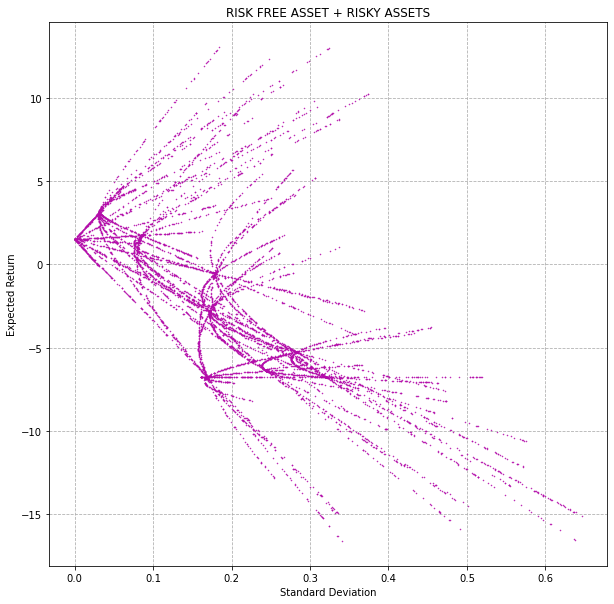

In [13]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
ax.grid(visible=True, linestyle='--')
ax.set_title('RISK FREE ASSET + RISKY ASSETS')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Expected Return')
ax.plot(Std_, Er_, marker='.', color='#B40DAA', markersize=1, linestyle='')

In [14]:
def optimal_portfolio_(u, V, q):
    x = cvx.Variable(u.shape)
    f = cvx.quad_form(x.T, V) - q*(u @ x.T) 
    prob = cvx.Problem(cvx.Minimize(f), 
                      [cvx.sum(x) == 1])
    prob.solve(solver=cvx.ECOS)
    return x.value

def sharpe_optimal_portfolio_(u, V):
    q = 1.
    s = optimal_portfolio_(u=u, V=V, q=q)
    s[0,0] = 0.
    s = s/np.sum(s)
    return s

def efficient_frontier_(u, V):
    s = sharpe_optimal_portfolio_(u, V)
    std = standard_deviation(V, s)[0]
    er = expected_return(u, s)[0]
    
    a = (er-rf)/std
    b = rf
    
    def ef(s):
        return a*s+b
    return ef

In [15]:
x_ = sharpe_optimal_portfolio_(u_, V_)
x_

array([[ 0.        ,  1.23703145, -0.10698923,  0.12709014, -0.05125119,
        -0.10269351,  0.19716622, -0.34209353,  0.04173966]])

In [16]:
s_ = (np.max(Std_)-np.min(Std_))*np.random.rand(10000)+np.min(Std_)
r_ = efficient_frontier_(u_, V_)(s_)

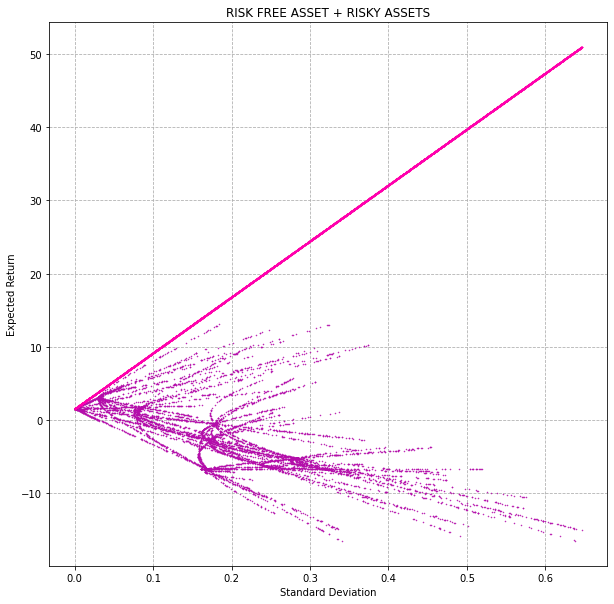

In [17]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
ax.grid(visible=True, linestyle='--')
ax.set_title('RISK FREE ASSET + RISKY ASSETS')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Expected Return')
ax.plot(Std_, Er_, marker='.', color='#B40DAA', markersize=1, linestyle='')
ax.plot(s_, r_, marker='.', color='#FF00AE', markersize=1, linestyle='')

-----

In [18]:
def sharpe_optimal_portfolio(u, V, rf):
    x = cvx.Variable(u.shape)
    f = cvx.quad_form(x.T, V)
    prob = cvx.Problem(cvx.Minimize(f), 
                      [(u-rf) @ x.T == 1])
    prob.solve(solver=cvx.ECOS)
    return x.value/np.sum(x.value)

In [19]:
x = sharpe_optimal_portfolio(u=u, V=V, rf=rf)
x

array([[ 1.23703149, -0.10698926,  0.12709003, -0.05125115, -0.10269346,
         0.19716615, -0.34209343,  0.04173964]])

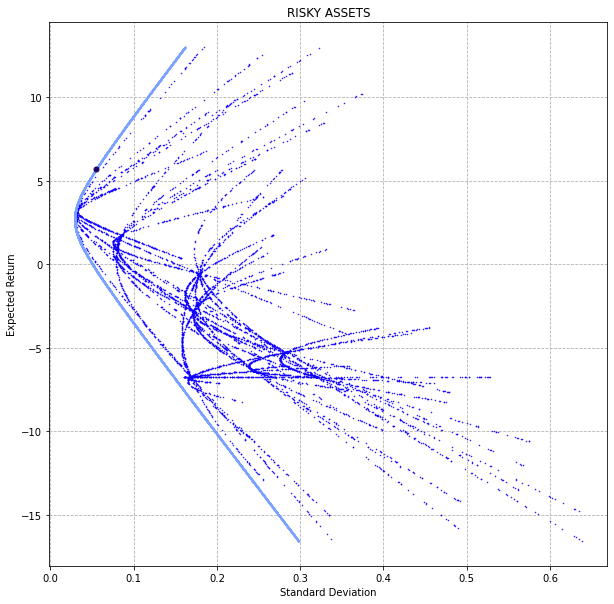

In [20]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
ax.grid(visible=True, linestyle='--')
ax.set_title('RISKY ASSETS')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Expected Return')
ax.plot(Std, Er, marker='.', color='#0F00FF', markersize=1, linestyle='')
ax.plot(s, r, marker='.', color='#79A3FF', markersize=1, linestyle='')
ax.plot(standard_deviation(V, x)[0], expected_return(u, x)[0], marker='.', color='#1C0060', markersize=10, linestyle='')

In [21]:
def beta(e,x, V):
    return (np.dot(e,np.dot(V, x.T))/np.dot(x,np.dot(V, x.T))).reshape((1,-1))
    
def capm(beta, rf):
    def er(f):
        return beta*f + rf
    return er 

In [22]:
e = np.identity(u.shape[1])
b = beta(e, x, V)

In [23]:
Capm = capm(b, rf)(expected_return(u, x)[0]-rf)

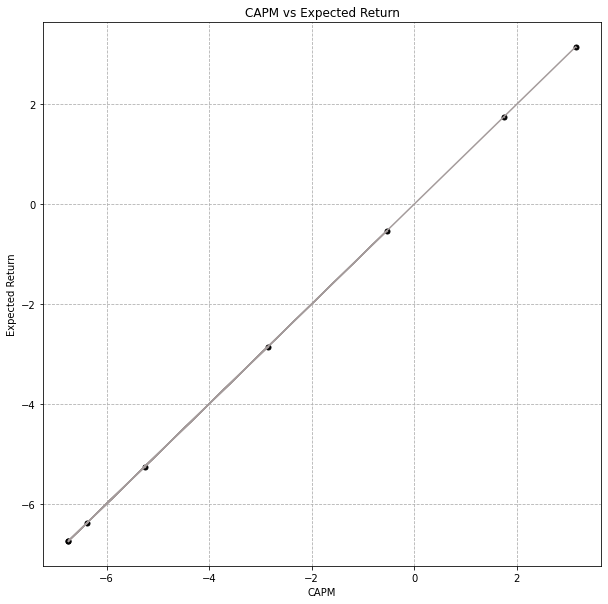

In [24]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
ax.grid(visible=True, linestyle='--')
ax.set_title('CAPM vs Expected Return')
ax.set_xlabel('CAPM')
ax.set_ylabel('Expected Return')
ax.plot(Capm.flatten(), u.flatten(), marker='.', color='#000000', markersize=10, linestyle='')
ax.plot(u.flatten(),  u.flatten(), marker='.', color='#A49B9B', markersize=1, linestyle='-')